# Project ON LINEAR REGRESSION WITH SGD (Stochastic Gradient Descent)

# Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled per litre)

# Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plp
import seaborn as sns

# Exploratory data analysis

In [2]:
#data given - Vehicle performance Prediction
#data is given in csv format
#data should be read by using pandas 

# Importing data using pandas

In [3]:
veh_data = pd.read_csv('Vehicle.csv')

In [4]:
veh_data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


# Filtering the columns needed

In [5]:
col_to_use = ['origin','cylinders','displacement','horsepower','weight','acceleration','Kilometer_per_liter']

In [6]:
veh_data = veh_data[col_to_use]

# Removing the Special characters

In [9]:
veh_data = veh_data.replace({'?': np.nan}).dropna()

# Converting the string to float

In [10]:
veh_data['horsepower']=pd.to_numeric(veh_data['horsepower'],downcast="float")

In [98]:
# Dependent variable - Kilometer_per_liter
# Independent variable - origin,cylinders,displacement,horsepower,weight,acceleration

# Check for the type

In [11]:
veh_data.info()                            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    float32
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   Kilometer_per_liter  392 non-null    float64
dtypes: float32(1), float64(3), int64(3)
memory usage: 23.0 KB


# to show all count,mean,std,min,etc.,

In [12]:
veh_data.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469391,2977.584184,15.541327,9.967885
std,0.805518,1.705783,104.644004,38.491138,849.402560,2.758864,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,19.811697


# check for any null values present

In [13]:
veh_data.isnull().sum() 

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
Kilometer_per_liter    0
dtype: int64

In [14]:
# No null values present

# Univariate and Bivariate Analysis

# Correlation

In [15]:
veh_data_corr = veh_data.corr()

In [16]:
veh_data_corr

,origin,cylinders,displacement,horsepower,weight,acceleration,Kilometer_per_liter
origin,1.000000,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.565209
cylinders,-0.568932,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,-0.614535,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,-0.455171,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,-0.585005,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,0.212746,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
Kilometer_per_liter,0.565209,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


# we should need atleast 6 graphs to be used for check all the datas

# Graph 1 :heatmap is used (commonly used)

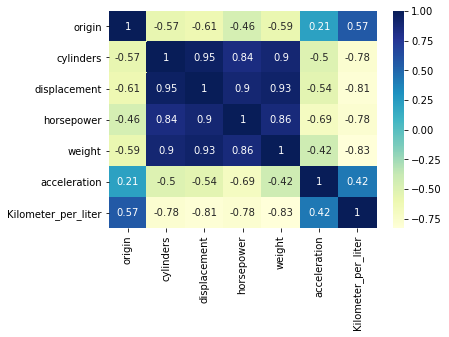

In [17]:
sns.heatmap(veh_data_corr,annot=True,cmap= 'YlGnBu');  

# Graph 2 : pairplot is used

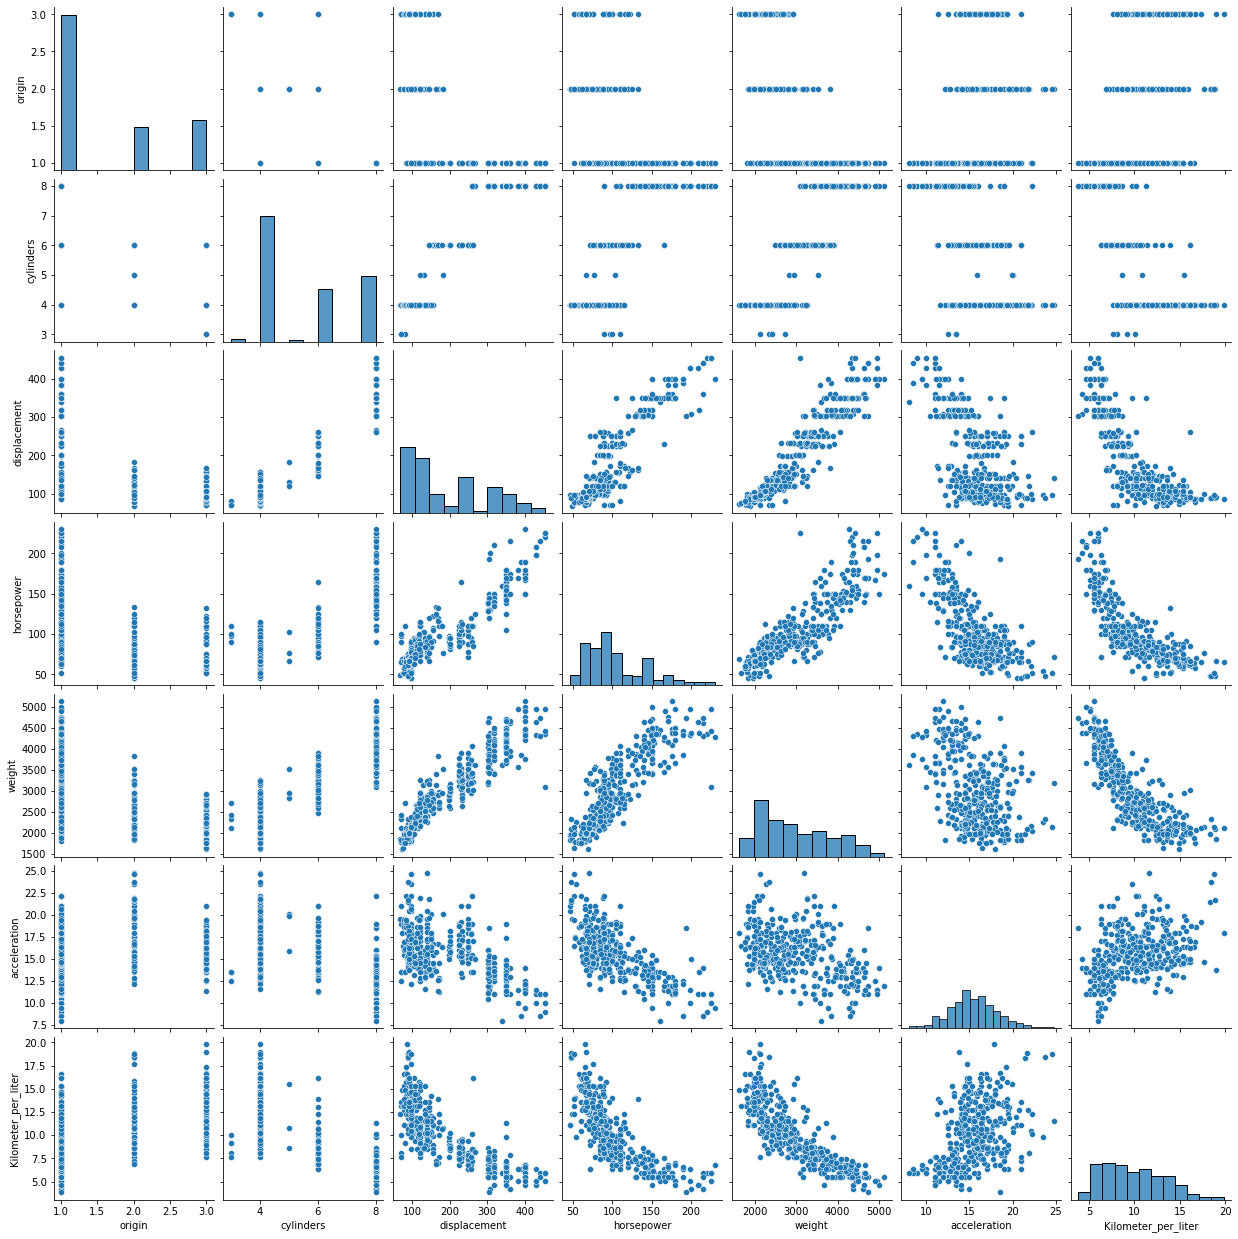

In [18]:
sns.pairplot(veh_data);

# Graph 3 : Boxplot is used

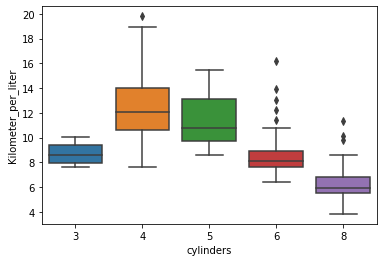

In [19]:
sns.boxplot(x="cylinders",y="Kilometer_per_liter",data=veh_data);

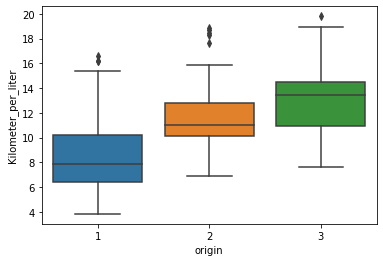

In [20]:
sns.boxplot(x="origin",y="Kilometer_per_liter",data=veh_data);

# Graph 4 : jointplot is used

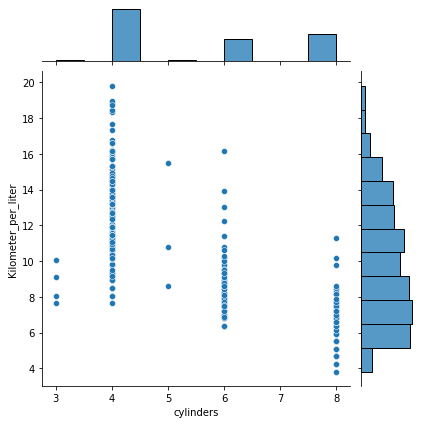

In [21]:
sns.jointplot(x="cylinders",y='Kilometer_per_liter',data=veh_data);

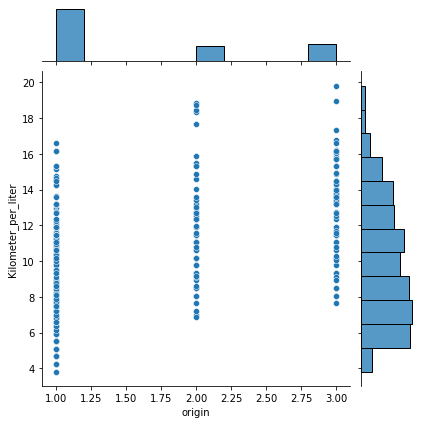

In [22]:
sns.jointplot(x="origin",y='Kilometer_per_liter',data=veh_data);

# Graph 5 : catplot is used

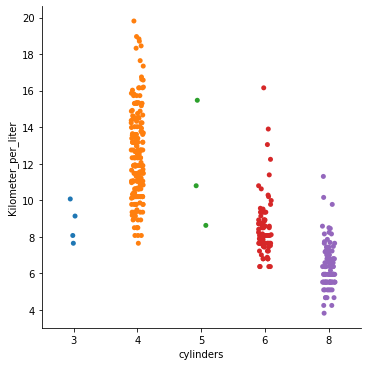

In [23]:
sns.catplot(x='cylinders',y='Kilometer_per_liter',data=veh_data);

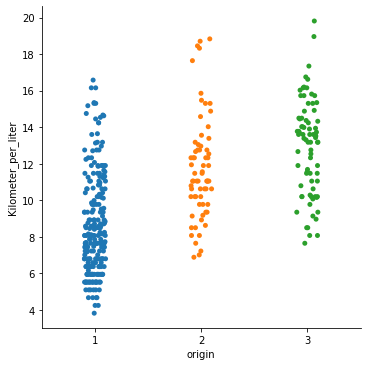

In [24]:
sns.catplot(x='origin',y='Kilometer_per_liter',data=veh_data);

# Graph 6 : barplot is used 

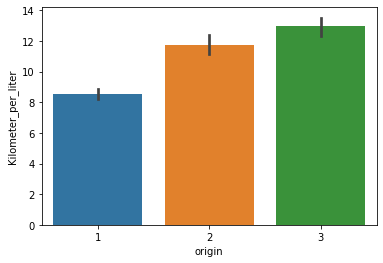

In [25]:
sns.barplot(x='origin',y='Kilometer_per_liter',data=veh_data);

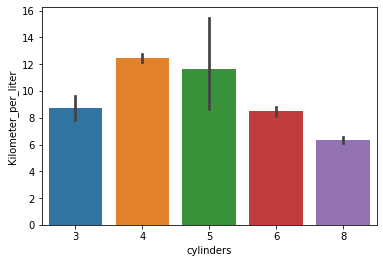

In [26]:
sns.barplot(x='cylinders',y='Kilometer_per_liter',data=veh_data);

# Seperating the dependant variable and store it in a variable y_dep

In [27]:
y_dep = veh_data.Kilometer_per_liter

# Dependant Variable

In [28]:
y_dep

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

# Seperating the independant variable by dropping the dependant variable and store in the variable as x_ind

In [29]:
x_ind = veh_data.drop("Kilometer_per_liter",axis=1)

# Independant variables

In [30]:
x_ind

,origin,cylinders,displacement,horsepower,weight,acceleration
0,1,8,307.0,130.0,3504,12.0
1,1,8,350.0,165.0,3693,11.5
2,1,8,318.0,150.0,3436,11.0
3,1,8,304.0,150.0,3433,12.0
4,1,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6
394,2,4,97.0,52.0,2130,24.6
395,1,4,135.0,84.0,2295,11.6
396,1,4,120.0,79.0,2625,18.6


# checking P value and R-sqr

# By using Ordinary Least Square line(OLS) method

In [43]:
import statsmodels.api as sm                                   #importing library

In [44]:
model = sm.OLS(y_dep,x_ind)                           #using OLS(a,b), for fit in OLS,(The dep shuld be a and indep shuld be b )

In [45]:
my_fit=model.fit();

In [46]:
my_fit.summary()                                      # Variable selection                               
                                                      # checkings 1. R-squared (to check whether the model is good or bad)
                                                      # R-Square = (0.5 - 1) - good
                                                      # R-Square = less than 0.5 not good
                                                      # p-value = 0.05(less than - allow , greater than - remove )
                                                      # if p-value is greater - remove the column (not necessary nowadays)    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Kilometer_per_liter   R-squared (uncentered):                   0.954
Model:                             OLS   Adj. R-squared (uncentered):              0.953
Method:                  Least Squares   F-statistic:                              1326.
Date:                 Wed, 25 Aug 2021   Prob (F-statistic):                   4.64e-254
Time:                         16:55:31   Log-Likelihood:                         -875.83
No. Observations:                  392   AIC:                                      1764.
Df Residuals:                      386   BIC:                                      1787.
Df Model:                            6                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
origin           1.2389      0.184      6.741      0.000       0.878       1.600
cylinders        0.7222      0.207      3.486      0.001       0.315       1.130
displacement    -0.0125      0.005     -2.533      0.012      -0.022      -0.003
horsepower       0.0352      0.008      4.548      0.000       0.020       0.050
weight          -0.0025      0.000     -5.643      0.000      -0.003      -0.002
acceleration     0.6479      0.041     15.702      0.000       0.567       0.729
==============================================================================
Omnibus:                       17.389   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.608
Skew:                           0.405   Prob(JB):                     2.03e-05
Kurtosis:                       3.816   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# in the given model , The R square = 0.954 is in the range (0.5-1) which the model is good
# in the given model , The P value = 0.00,0.001,0.015 is less than 0.05 , we need to remove columns(greater than 0.05) 
#, all are significant
# Further process

# Training linear regression model with SGD for prediction

# importing the libraries needed for ML

In [48]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8,random_state=1)

In [50]:
#x_train - 80% of independent data
#x_test -  20% of independent data
#y_train - 80% of  dependant data
#y_test - 20% of dependant data

# Before Normalization 

# x_train

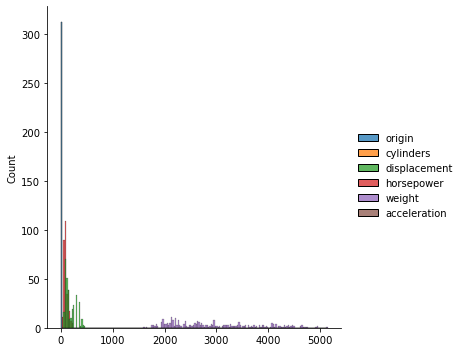

In [51]:
sns.displot(x_train)

# x_test

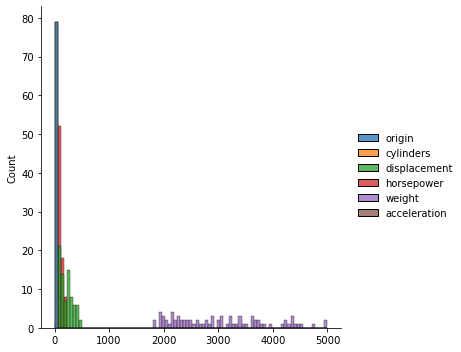

In [52]:
sns.displot(x_test)

# when using data like distance model, need to standartise (mean = 0 , std = 1)
# to standartise Standard Scaler is used 

In [53]:
#Importing Library for Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
norm = StandardScaler()

In [56]:
x_train = norm.fit_transform(x_train)

In [57]:
x_train

array([[-0.73274366, -0.82562274, -0.53177235, -0.50001322, -0.55615297,
        -0.0016438 ],
       [-0.73274366,  0.35168896,  0.34617796,  0.18675599,  0.77758093,
         1.10087503],
       [ 0.5069794 , -0.82562274, -0.89270748, -0.52642743, -0.87601305,
         0.29236122],
       ...,
       [-0.73274366,  1.52900065,  1.14608824,  0.71504001,  1.34176217,
        -0.62640446],
       [-0.73274366, -0.82562274, -0.89270748, -1.05471144, -1.07430269,
         0.47611436],
       [-0.73274366,  1.52900065,  1.56555339,  1.63953704,  1.47277497,
        -1.36141701]])

In [58]:
x_test = norm.fit_transform(x_test)

In [59]:
x_test

array([[ 1.86681002, -1.03065464, -0.85328193, -0.33843638, -0.63158896,
        -0.14129336],
       [ 1.86681002, -1.03065464, -1.06245804, -0.88713268, -1.02595951,
         0.3953497 ],
       [ 1.86681002, -1.03065464, -0.96241729, -0.88713268, -0.81523614,
         0.68155934],
       [ 0.60631436, -1.03065464, -0.84418732,  0.03567473, -0.20543331,
         0.21646868],
       [ 1.86681002, -1.03065464, -1.11702571, -1.0866586 , -1.23315121,
         0.46690211],
       [-0.65418129, -1.03065464, -1.05336342, -0.68760675, -1.13897316,
         0.3595735 ],
       [ 0.60631436, -1.03065464, -1.07155265, -1.03677712, -1.00476945,
         1.11087379],
       [-0.65418129,  1.32939512,  0.94745147,  0.98342288,  1.40618846,
        -0.14129336],
       [ 1.86681002, -1.03065464, -1.06245804, -0.46314008, -0.88822412,
         0.75311175],
       [ 1.86681002, -1.03065464, -0.9715119 , -0.9619549 , -0.88586967,
         0.75311175],
       [-0.65418129,  0.14937024,  0.15622013,  0.

# After normalization 

# x_train

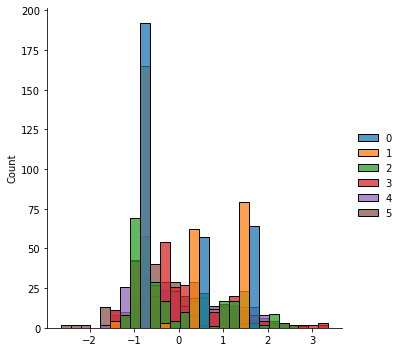

In [60]:
sns.displot(x_train)

# x_test

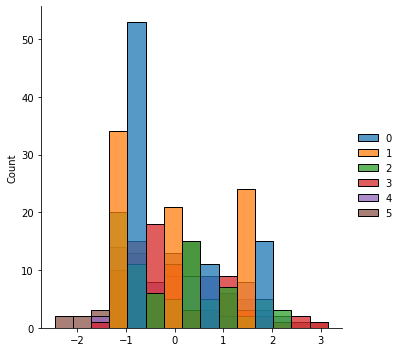

In [61]:
sns.displot(x_test)

# SGD Regressor

In [62]:
#Import library 

In [63]:
from sklearn.linear_model import SGDRegressor

# Creating model

In [64]:
model = SGDRegressor()

# Fit the model

In [65]:
model.fit(x_train, y_train)

SGDRegressor()

In [66]:
y_pred = model.predict(x_test)

# Predicted Values

In [67]:
y_pred

array([12.27418054, 13.35297294, 13.04716138, 10.72054493, 13.82861941,
       12.06991711, 12.83571991,  6.5445717 , 12.77308144, 13.21370982,
        9.16120541, 12.74758149,  7.66101832, 13.84877702, 11.26516861,
        8.06836117, 11.51724332, 13.08777004,  4.53014097, 10.03427146,
       12.57853709,  8.60872857,  7.89147949,  6.15108299,  5.09697609,
        6.95337619, 13.71114474,  8.86290583,  9.60678898, 11.4933376 ,
        7.983452  , 10.80243696,  5.9537352 ,  9.88632132,  9.10107373,
        6.83313315,  8.76166085,  8.92196799, 13.87818336, 13.12138318,
        5.35151212,  5.60081415, 11.07845873, 10.05509824, 10.23578079,
        8.45047488,  5.19314181, 13.84390672,  9.53544615,  4.05527255,
        7.47645284,  9.81296331, 10.85511543, 11.63915035, 13.56277113,
       10.09308739, 10.30280399, 10.95580435, 11.05469769, 14.3018526 ,
       10.16718322, 11.98904281, 13.91251899,  8.95591096,  9.98843314,
        9.78732462, 10.62242582,  7.29260267, 13.22912847,  4.60

# Accuracy for SGD

In [68]:
model.score(x_test,y_test)                               

0.7347028407497435

# Mean Square Error

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
Error = mean_squared_error(y_test,y_pred)
Error

3.3241217283220674

# Root Mean Square

In [72]:
root_mean = np.sqrt(Error)
root_mean

1.8232174111504276

# Creating a Dataframe for y_test and y_pred

In [73]:
f_com= pd.DataFrame({"Actual":y_test,"Machine_predicted":y_pred})
f_com

,Actual,Machine_predicted
82,9.778305,12.274181
167,12.329168,13.352973
356,13.774656,13.047161
120,8.077730,10.720545
385,16.155461,13.828619
...,...,...
23,11.053736,11.716995
295,15.177630,12.397159
13,5.952012,6.443603
91,5.526868,6.049544


# Residual

In [74]:
Residual=y_pred-y_test                                                  # predicted test value - actual test value

In [75]:
Residual                                                          # The difference between the actual and the machine_predicted

82     2.495875
167    1.023805
356   -0.727495
120    2.642814
385   -2.326841
         ...   
23     0.663258
295   -2.780471
13     0.491591
91     0.522675
62     0.563898
Name: Kilometer_per_liter, Length: 79, dtype: float64

# Graphical representation

In [76]:
x_test.shape                                   #to check how much datas present in x_test

(79, 6)

In [77]:
comp_g= f_com.head(100)                      #how much datas we needed

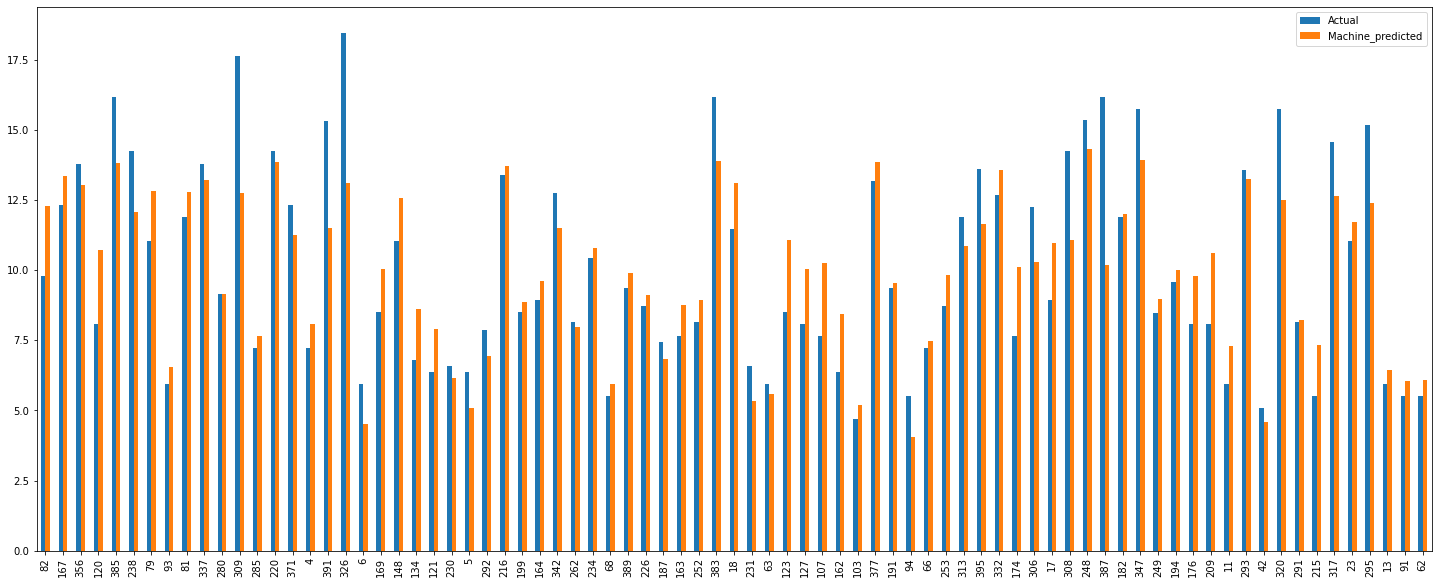

In [78]:
comp_g.plot(kind="bar",figsize=(25,10));                            #graph ,figsize(width,height)

# SGD will fit the values till it reaches the minimum error
# from this model the accuracy comes around 73%
# The minimum error the SGD predicted is around (20-27%)